# Feature Selecction/ Dimension Reduction Using LassoCV

In [16]:
#import all the required package
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
import matplotlib
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output
from sklearn.preprocessing import StandardScaler

  
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
df = pd.read_csv("../../Data/Mice Data/data_after_mice_1.csv",header=0,encoding='utf-8')

In [3]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_month,issue_year,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000,5000,4975.0,36,10.65,162.87,10,24000.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,0,30000.0,12,2011,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,10,12252.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,10,49200.0,12,2011,...,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,1,80000.0,12,2011,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887270,10000,10000,10000.0,36,11.99,332.10,8,31000.0,1,2015,...,0,0,0,0,0,0,0,0,0,0
887271,24000,24000,24000.0,36,11.99,797.03,10,79000.0,1,2015,...,0,0,0,0,0,0,0,0,0,0
887272,13000,13000,13000.0,60,15.99,316.07,5,35000.0,1,2015,...,0,0,0,0,0,0,0,0,1,0
887273,12000,12000,12000.0,60,19.99,317.86,1,64400.0,1,2015,...,0,0,0,0,0,0,0,0,1,0


In [4]:
#split the data in train ,test , cv
size = df.shape[0]
rs = 1
Train, Test = train_test_split(df, test_size= 0.2, random_state= rs)
CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(709820, 92) (88727, 92) (88728, 92)


In [5]:
#split the data in dependent and independent variable
Train_y = np.array(Train["int_rate"])
CV_y = np.array(CV["int_rate"])
Test_y = np.array(Test["int_rate"])
Train_x = Train.drop(["int_rate"], axis = 1)
CV_x = CV.drop(["int_rate"], axis = 1)
Test_x = Test.drop(["int_rate"], axis = 1)

RMSE of Lasso:  0.6656138749228219


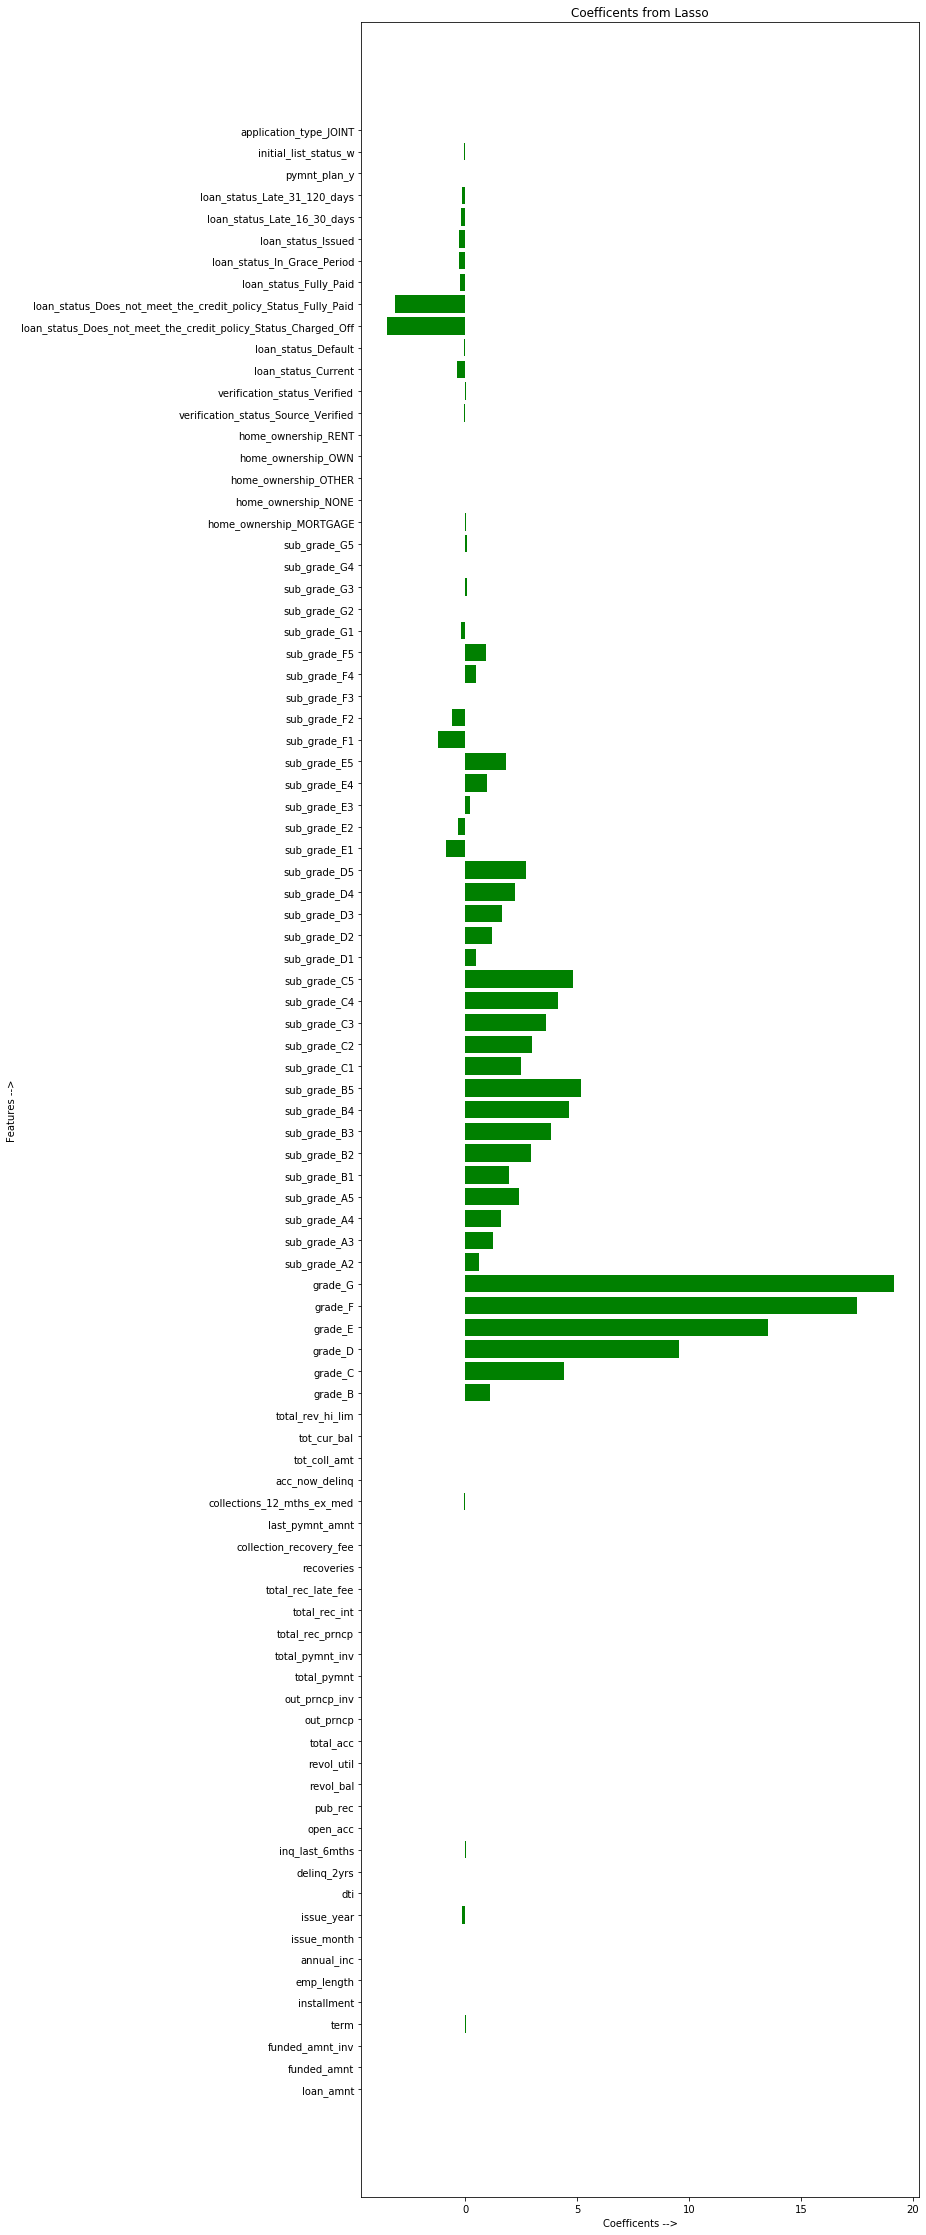

In [6]:
#perform lassocv for variable selection
modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(Train_x, Train_y)
lassopred = modellasso.predict(CV_x)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, CV_y)))

coeff = modellasso.coef_

x = list(Train_x)
x_pos = [i for i, _ in enumerate(x)]


plt.figure(figsize = (10,40))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)

plt.show()



In [28]:
print("Lasso picked " + str(sum(coeff != 0)) + " variables and eliminated the other " +  str(sum(coeff == 0)) + " variables")

Lasso picked 82 variables and eliminated the other 9 variables
